In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Review Python lists and tuples

In [225]:
python_list = ["one",2,3.0]
print(python_list)

['one', 2, 3.0]


In [198]:
# lists are enclosed by [], while tuples are eclosed by ()

list1 = [1,2,3,4]
tuple1 = (1,2,3,4)

print(f"list: {list1}")
print(f"tuple: {tuple1}")

list: [1, 2, 3, 4]
tuple: (1, 2, 3, 4)


In [199]:
# both lists and tuples can contain any combination of data types and objects

list2 = ["one",2,tuple1]
tuple2 = ("three",4,list1)

print(f"list: {list2}")
print(f"tuple: {tuple2}")

list: ['one', 2, (1, 2, 3, 4)]
tuple: ('three', 4, [1, 2, 3, 4])


In [200]:
# the main difference between lists and tuples is that tuples are immutable.
# that means they can't be changed after they are created

list2[2] = 3 # this works!
print(list2)

tuple2[2] = 5 # this will throw an exception!

['one', 2, 3]


TypeError: 'tuple' object does not support item assignment

#### Review of Slicing Notation

In [201]:
# Subarrays can be selected using python slicing notation
# a:b will select a list starting with index a and ending with index b-1
# a: will start with index a and return the rest of the list
# :b will start from the beginning and return up to the index b-1
# : will return the entire list

list1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(list1[2:6])
print(list1[5:])
print(list1[:5])
print(list1[:])

[2, 3, 4, 5]
[5, 6, 7, 8, 9]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [202]:
# example with a list of lists

matrix = [[1,2,3],[4,5,6],[7,8,9]]
print(matrix[0]) # this will select the first row, but how do we select a column?
print([row[0] for row in matrix]) # a list comprehension works, but  isn't very readable. Numpy is much easier!

[1, 2, 3]
[1, 4, 7]


# Numpy Arrays

In [ ]:
# numpy arrays can be created using lists or tuples
npArray = np.array([1,2,3,4])
print(npArray)

# they will always have a dtype which determines the size of each element. It can be implied by the data or 
# set explicitly
print(npArray.dtype) # print the dtype set implicitly 
print()

npArray_float = npArray.astype(np.float32) # create a copy of the array using the float32 dtype
print((npArray_float))
print(npArray_float.dtype) 
print()

npArray_smallInt = np.array([1,2,3,4],dtype=np.int8) # initialize an array with int8 instead of the implied int64
print(npArray_smallInt)
print(npArray_smallInt.dtype)
print()

#beware of overflow errors!
overflow_npArray = np.array([128],dtype=np.int8) # the range of int8 is -128 to 127

[1 2 3 4]
int64

[1. 2. 3. 4.]
float32

[1 2 3 4]
int8



OverflowError: Python integer 128 out of bounds for int8

In [204]:
# selecting items from numpy array

matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("matrix: ")
print(matrix)
print()

row = matrix[1]
print("2nd row:")
print(row)
print()

col = matrix[:,1] # now we can use commas to select slices from different dimensions
print("2nd column:")
print(col)

matrix: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

2nd row:
[4 5 6]

2nd column:
[2 5 8]


In [ ]:
# There are several useful functions for creating numpy arrays

# np.ones() takes a shape as an argument and returns a numpy array filled with ones.
# the shape of an array is a tuple whose elements indicate the size of each dimension
onesArray = np.ones((5,),dtype=np.int32)
print("1D array:")
print(onesArray)
print("shape:")
print(onesArray.shape)
print()

# Numpy arrays can have any number of dimensions!
onesArray3D = np.ones((3,3,3),dtype=np.int32)
print("3D array:")
print(onesArray3D)
print("shape:")
print(onesArray3D.shape)

In [ ]:
# np.zeros will initialize each element with zero
zeros = np.zeros((3,3))
print("zeros:")
print(zeros)
print()

# np.empty will fill the elements with what already happens to be in memory. So it could contain anything!
empty = np.empty((3,3))
print("empty:")
print(empty)
print()

x:
[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]

y: 
[-4.         -5.55555556 -6.22222222 -6.         -4.88888889 -2.88888889
  0.          3.77777778  8.44444444 14.        ]


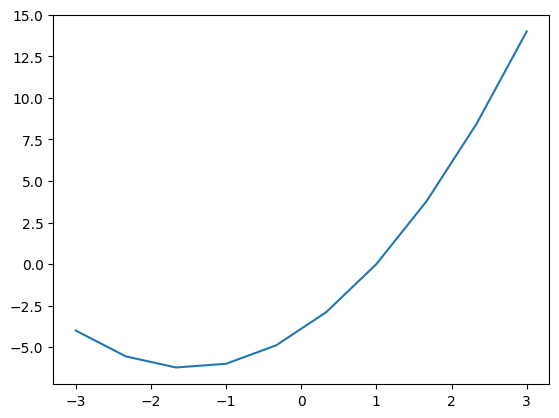

In [205]:
# np.linspace creates an array with evenly spaced floats between two numbers. This is useful for plotting functions!

# define a function we would like to plot
def function(x):
    return x**2 + 3*x - 4

# the first argument of np.linspace() is the starting number, the second is the 
x = np.linspace(start=-3,stop=3,num=10)
print("x:")
print(x)
print()

y = function(x)
print("y: ")
print(y)

plt.plot(x,y)
plt.show()

#### Numpy Performance

In [206]:
# numpy arrays have fixed data types and are vectorized. This makes them MUCH faster for performing computations!

# let's demonstrate this by calculating the element-wise product of two arrays
list1 = [1,2,3,4,5,6,7,8,9,10]
list2 = [10,9,8,7,6,5,4,3,2,1]

def list_multiply(l1,l2):
    result = []
    for i in range(0,len(l1)):
        result.append(l1[i]*l2[i])
    return result

list_multiply(list1,list2)

[10, 18, 24, 28, 30, 30, 28, 24, 18, 10]

In [207]:
%%timeit

# now let's time it
list_multiply(list1,list2)

192 ns ± 3.88 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [208]:
# now we'll try with numpy
np1 = np.array(list1)
np2 = np.array(list2)
np1 * np2

array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])

In [209]:
%%timeit
np1*np2

162 ns ± 2.75 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [210]:
#The time difference gets much larger with larger arrays!

# np.arange work similar to range() used in python for loops but returns an array with ints from 0 to the input number.
np1 = np.arange(1e6) 
np2 = np.flip(np1) # np.flip() will reverse the array
list1 = np1.tolist()
list2 = np2.tolist()

In [211]:
%%timeit
list_multiply(list1,list2)

24.9 ms ± 684 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [212]:
%%timeit
# Numpy is 50 times faster!
np1*np2

508 μs ± 9.36 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Real World Example

In [213]:
data = np.load("data.npy")
data

array([[-0.00741624, -0.00346634, -0.00373699, ...,         nan,
                nan,         nan],
       [-0.00376118, -0.00315071, -0.00420509, ...,         nan,
                nan,         nan],
       [-0.0080887 ,  0.00515506, -0.00540981, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], shape=(4507, 4134), dtype=float32)

In [215]:
print(f"min: {data.min()}") # since the data contains nans, all statistics will be nan

# numpy provides statistics functions that ignore nan values
nanmin = np.nanmin(data)
print(f"nanmin: {nanmin}")
nanmax = np.nanmax(data)
print(f"nanmax: {nanmax}")
nanmean = np.nanmean(data)
print(f"nanmean: {nanmean}")

min: nan
nanmin: -0.8988324999809265
nanmax: 114.48661804199219
nanmean: 0.003101859474554658


In [216]:
# numpy can also print a histogram of the data, but it can't handle nan values

np.histogram(data) #this will throw an exception

ValueError: autodetected range of [nan, nan] is not finite

In [217]:
# we can create a boolean mask to remove nan values before passing the array to np.histogram()

# np.isnan() will create an array with the same shape as 'data' filled with True where the values are nan 
# and False otherwise
is_nan = np.isnan(data)
mask = ~is_nan # we can create a mask that removes nan values by using the bitwise NOT operator ~
print(f"mask dtype: {mask.dtype}") # mask is a boolean array
masked_data = data[mask] # passing a boolean array as an index will return the indicies where the array is True
print(masked_data)

mask dtype: bool
[-0.00741624 -0.00346634 -0.00373699 ... -0.00181632  0.00484563
  0.00736435]


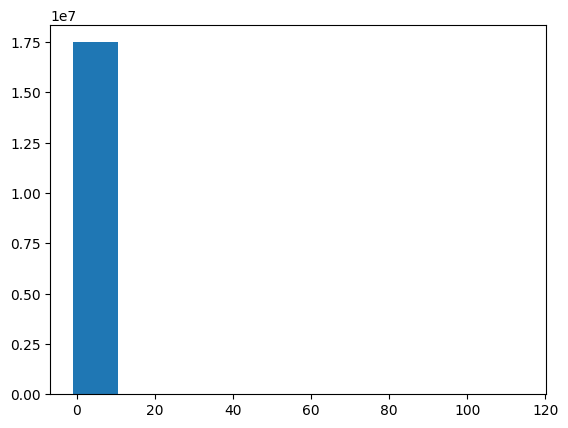

In [218]:
# np.histogram returns two arrays. The first is the count, and the second is the bin edges
count, bins = np.histogram(masked_data)

# we can plot it as a bar chart using numpy, but we have to remove the last bin
plt.bar(bins[:-1],height=count,width=bins[1]-bins[0],align='edge')
plt.show()

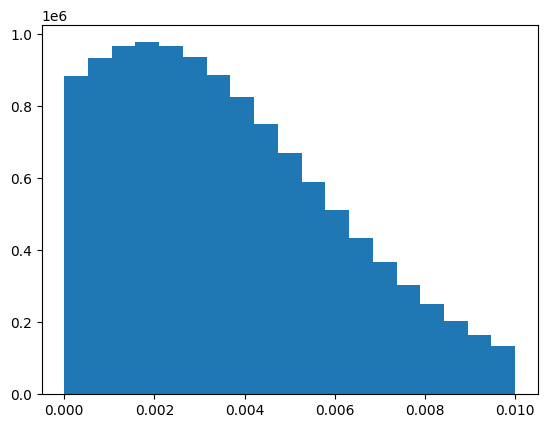

In [219]:
# most of the data is in the first bin, so lets plot the histogram with different bins
count, bins = np.histogram(masked_data,bins=np.linspace(0,0.01,20))

plt.bar(bins[:-1],height=count,width=bins[1]-bins[0],align='edge')
plt.show()

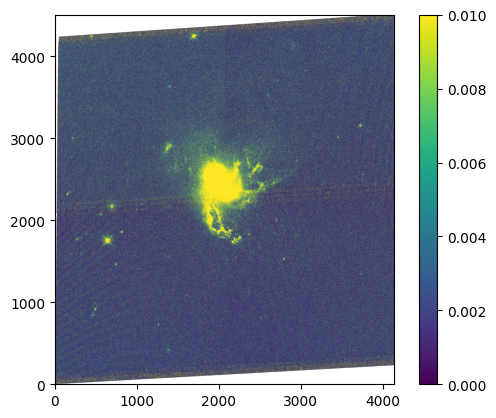

In [220]:
# now we can plot the 2D data as an image

plt.imshow(data,origin="lower",vmin=0,vmax=0.01)
plt.colorbar()
plt.show()

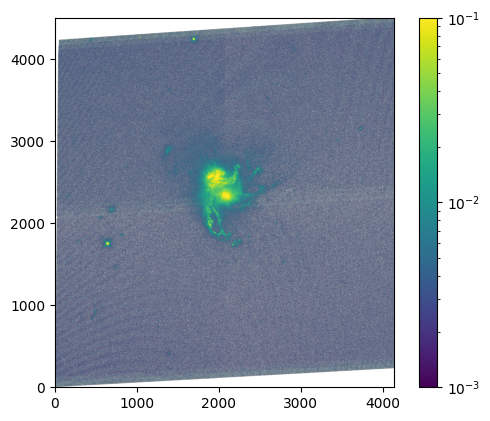

In [221]:
# sometimes a log scale is better!
plt.imshow(data,origin="lower",vmin=0.001,vmax=0.1,norm="log")
plt.colorbar()
plt.show()